This notebook will show the all methods of normalization.

In [1]:
%matplotlib notebook
from dla_cnn.desi.DesiMock import DesiMock
from dla_cnn.desi.preprocess import rebin
from dla_cnn.data_model.Sightline import Sightline
from os.path import join
from matplotlib import pyplot as plt
import numpy as np

In [2]:
file_num = [705,706,711,718,723,731,735,743,747,748,761,773,777,785,789,791]
path = '/Users/zjq/7'
file_path = join(path,str(file_num[0]))
spectra = join(file_path,"spectra-16-%s.fits"%file_num[0])
truth = join(file_path,"truth-16-%s.fits"%file_num[0])
zbest = join(file_path,"zbest-16-%s.fits"%file_num[0])#generate file path

In [3]:
a=[1,2,3,4]
a[1:]

[2, 3, 4]

### The methods of normalization

In [3]:
spec = DesiMock()
spec.read_fits_file(spectra,truth,zbest)

In [4]:
nspec = DesiMock()
nspec.read_fits_file(spectra,truth,zbest)

In [12]:
spec_id = list(spec.data.keys())
sightline = spec.get_sightline(spec_id[1],camera='r')
10**sightline.loglam


array([5625.39990234, 5626.39990234, 5627.39990234, ..., 7715.39990234,
       7716.39990234, 7717.39990234])

<IPython.core.display.Javascript object>


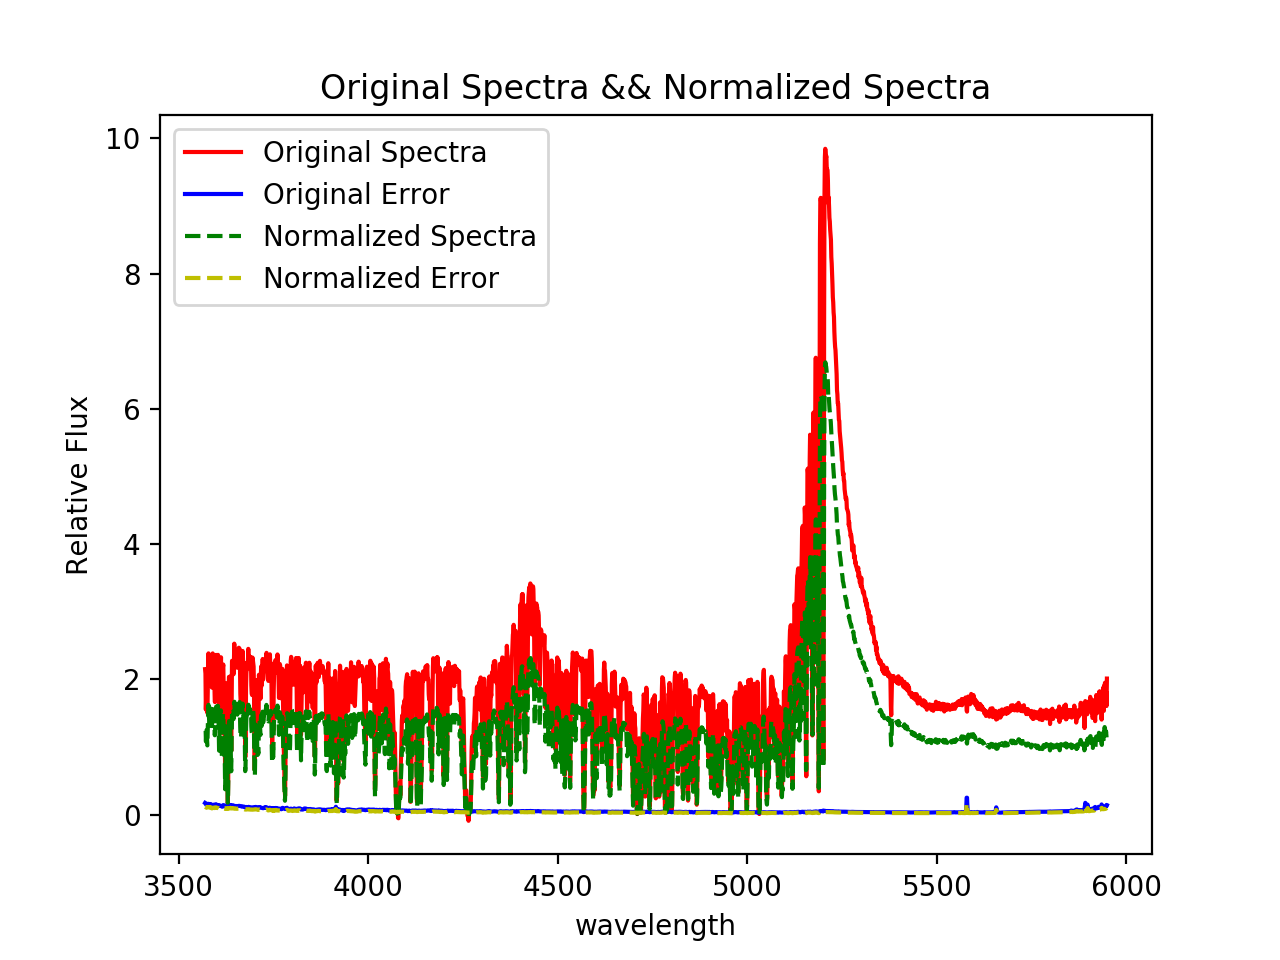

In [11]:
spec_id = list(spec.data.keys())
nspec_id = list(spec.data.keys())
sightline = spec.get_sightline(spec_id[0],camera='b')
new_sightline = nspec.get_sightline(spec_id[0],camera='b',rebin=True,normalize = True)

fig,axes = plt.subplots(1,1,sharex=True, sharey= True)
axes.plot(10**sightline.loglam,sightline.flux,'r',label = 'Original Spectra')
axes.plot(10**sightline.loglam,sightline.error,'b',label = 'Original Error')
axes.set(**{'title':'Original Spectra && Normalized Spectra'})
axes.set(**{'xlabel':'wavelength', 'ylabel':'Relative Flux'})

axes.plot(10**new_sightline.loglam,new_sightline.flux,'g--', label = 'Normalized Spectra')
axes.plot(10**new_sightline.loglam,new_sightline.error,'y--',label = 'Normalized Error')
axes.legend(loc = 'best')

<IPython.core.display.Javascript object>


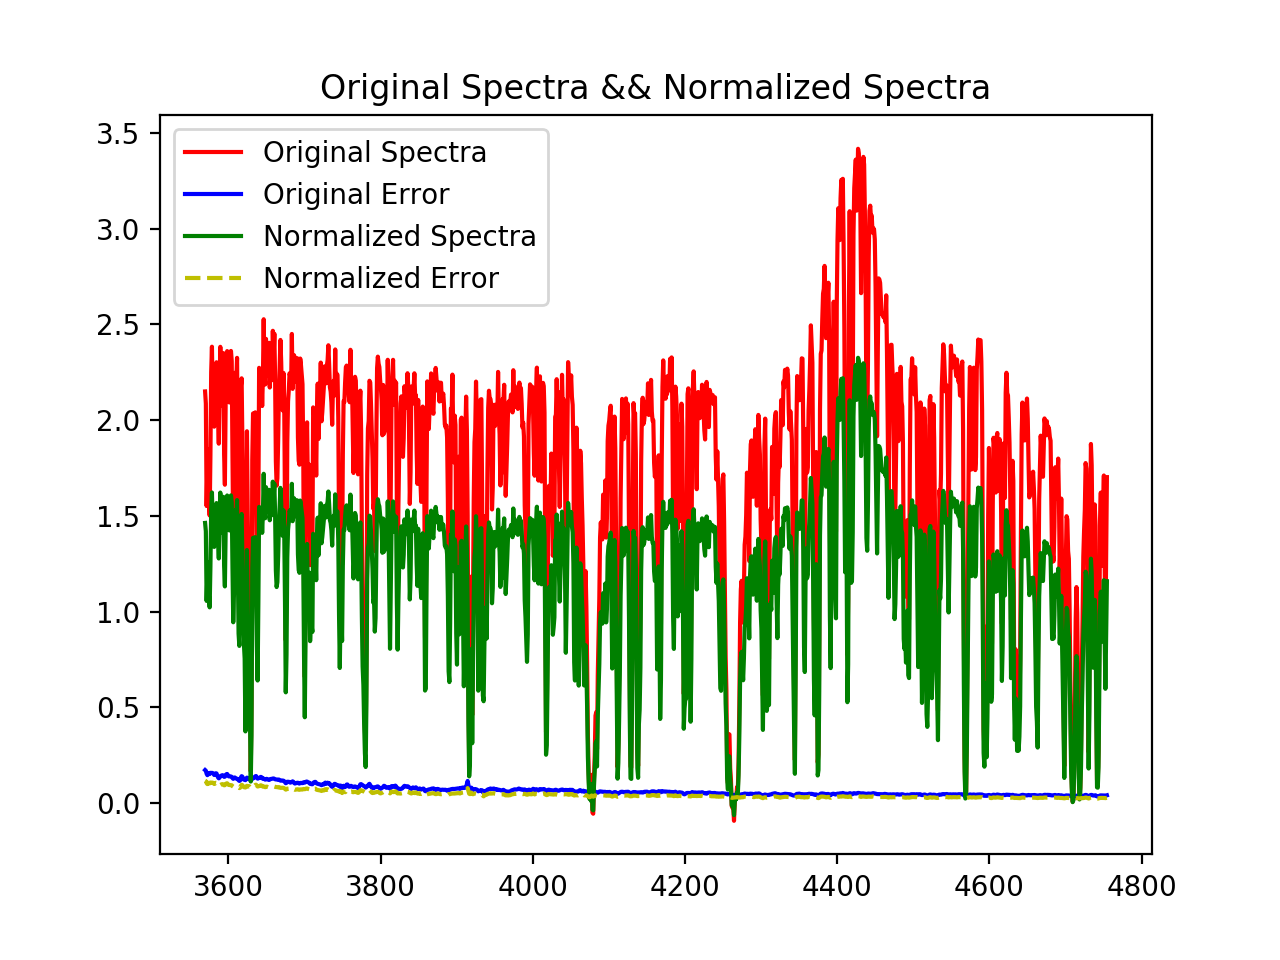

In [13]:
spec_id = list(spec.data.keys())
nspec_id = list(spec.data.keys())
sightline = spec.get_sightline(spec_id[0],camera='b')
new_sightline = nspec.get_sightline(spec_id[0],camera='b',normalize = True)
fig,axes = plt.subplots(1,1,sharex=True, sharey= True)
axes.plot(10**sightline.loglam,sightline.flux,'r',label = 'Original Spectra')
axes.plot(10**sightline.loglam,sightline.error,'b',label = 'Original Error')
axes.set(**{'title':'Original Spectra && Normalized Spectra'})
axes.plot(10**new_sightline.loglam,new_sightline.flux,'g', label = 'Normalized Spectra')
axes.plot(10**new_sightline.loglam,new_sightline.error,'y--',label = 'Normalized Error')
axes.legend(loc = 'best')

In [7]:
selected_spectrum = {}
for key,value in spec.data.items():
    z_qso = float("%.1f"%value['z_qso'])
    if z_qso<=4 and z_qso>=2 and z_qso not in selected_spectrum:
        selected_spectrum[z_qso] = key
    if len(selected_spectrum)==21:
        break

<IPython.core.display.Javascript object>


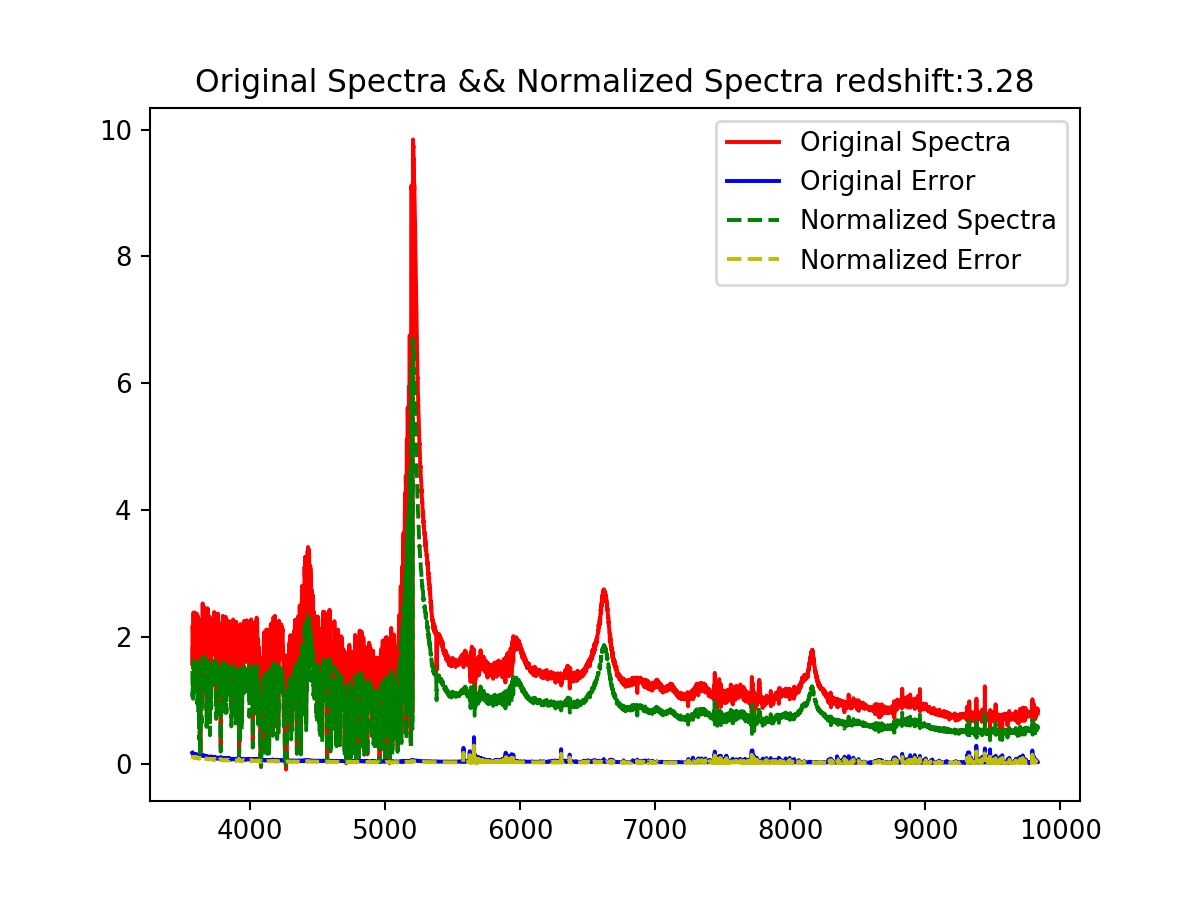

<IPython.core.display.Javascript object>


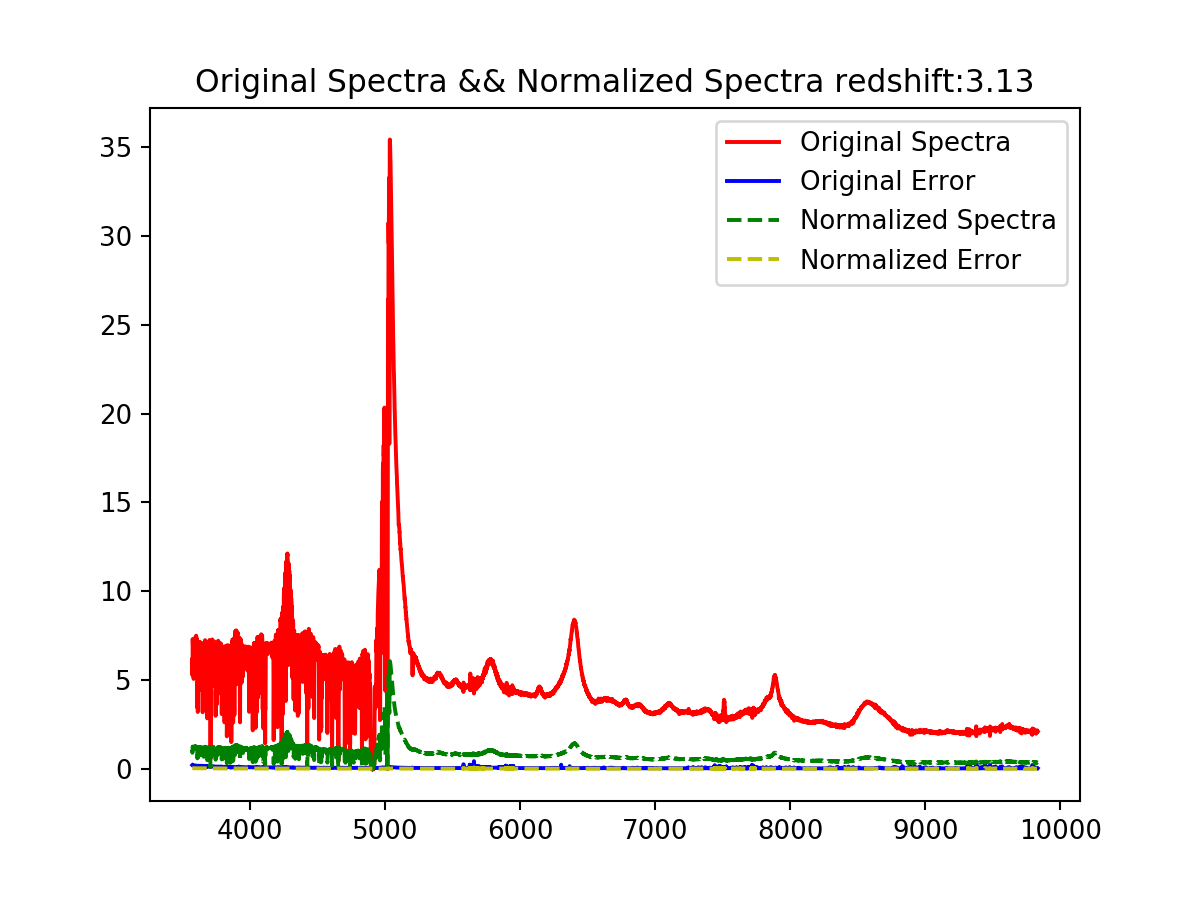

<IPython.core.display.Javascript object>


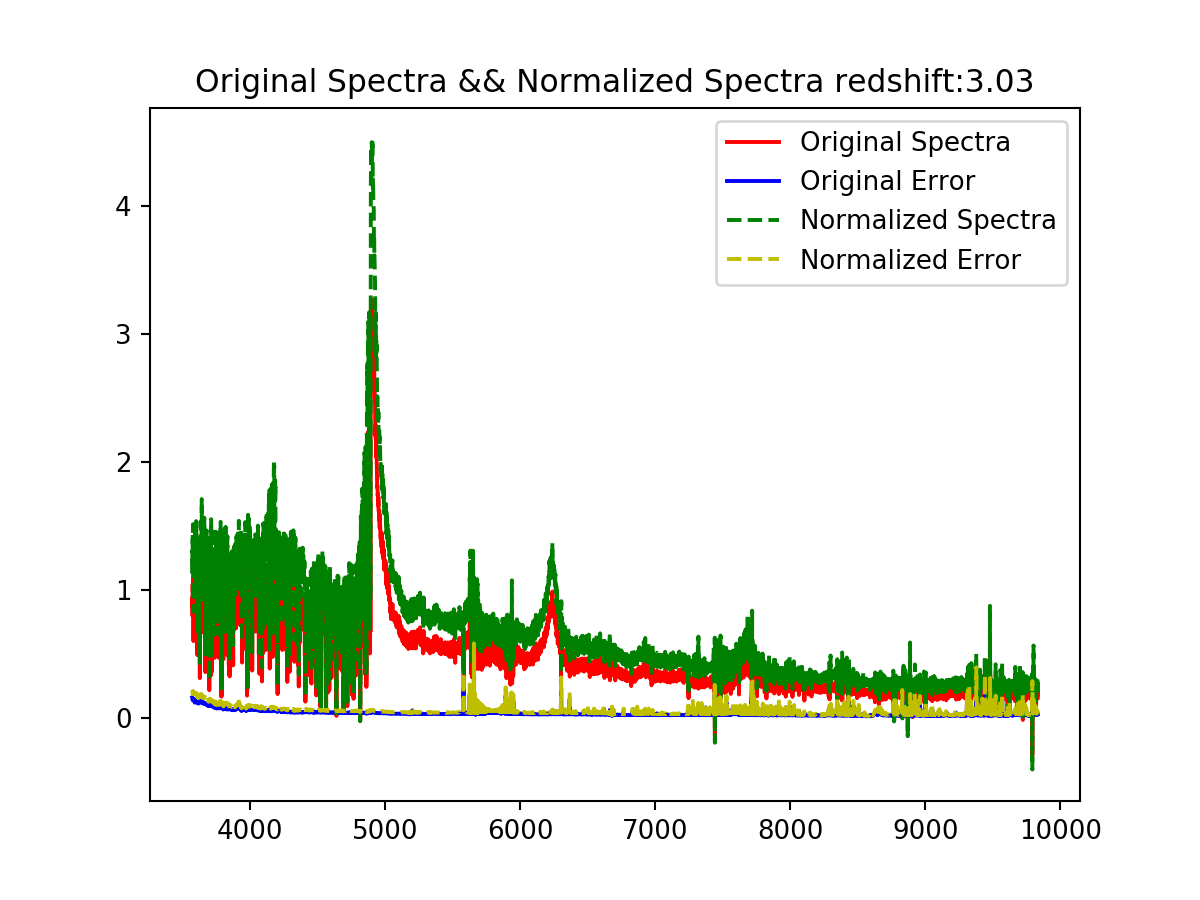

<IPython.core.display.Javascript object>


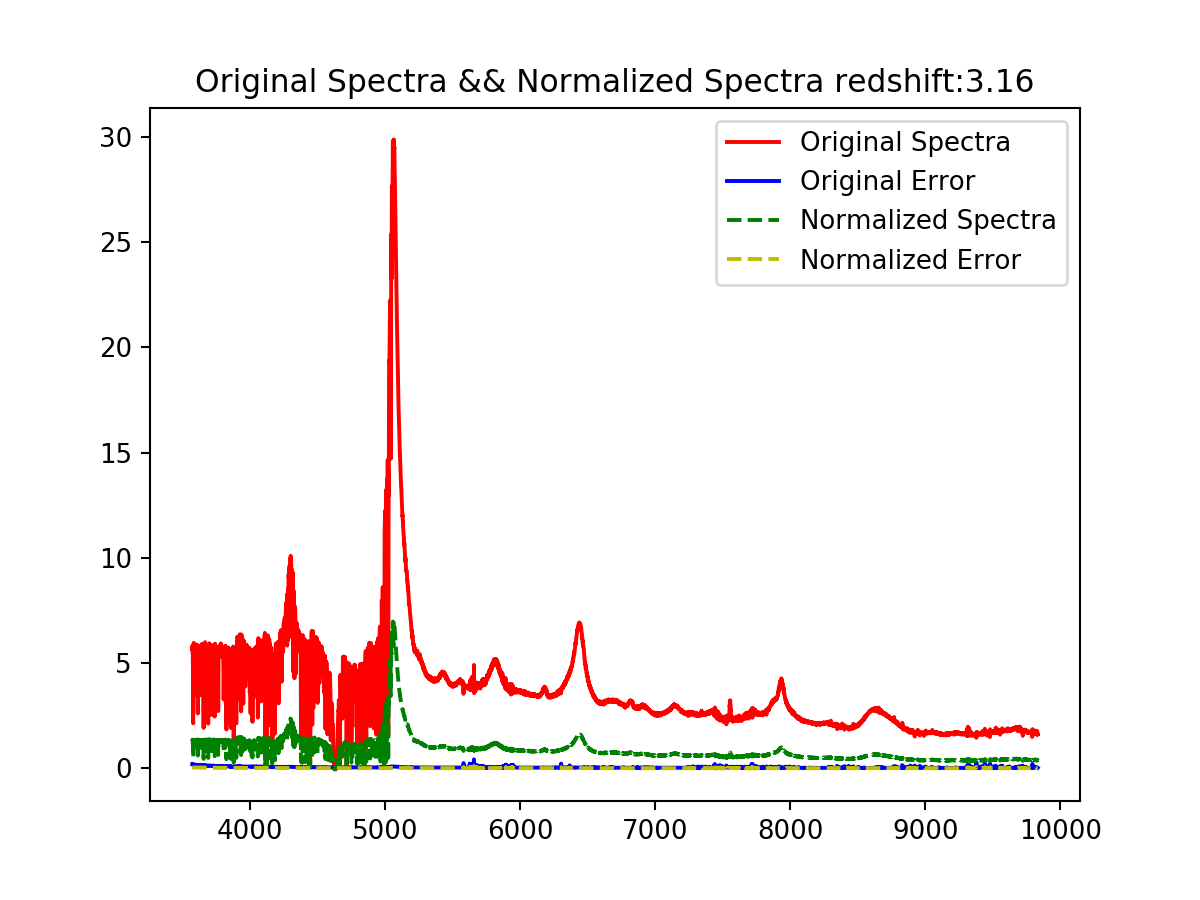

<IPython.core.display.Javascript object>


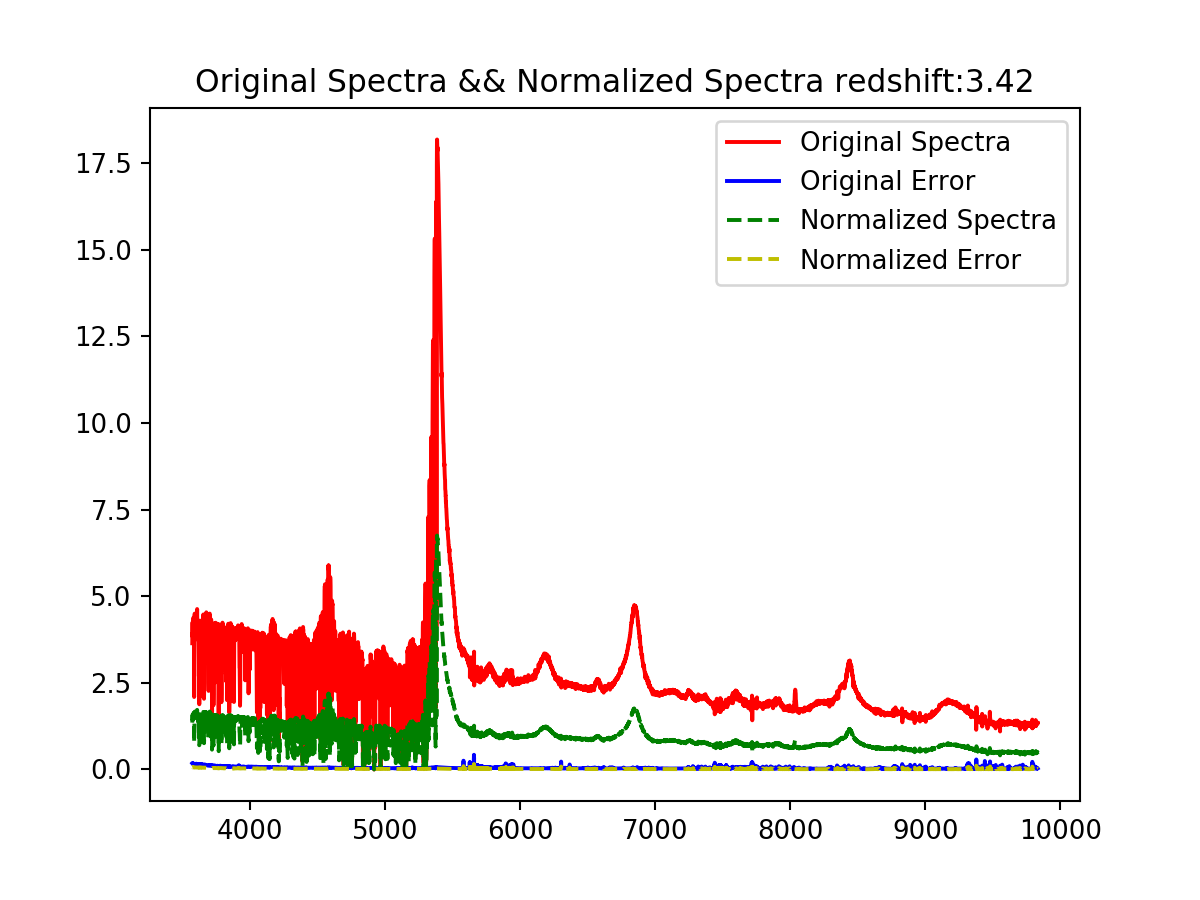

<IPython.core.display.Javascript object>


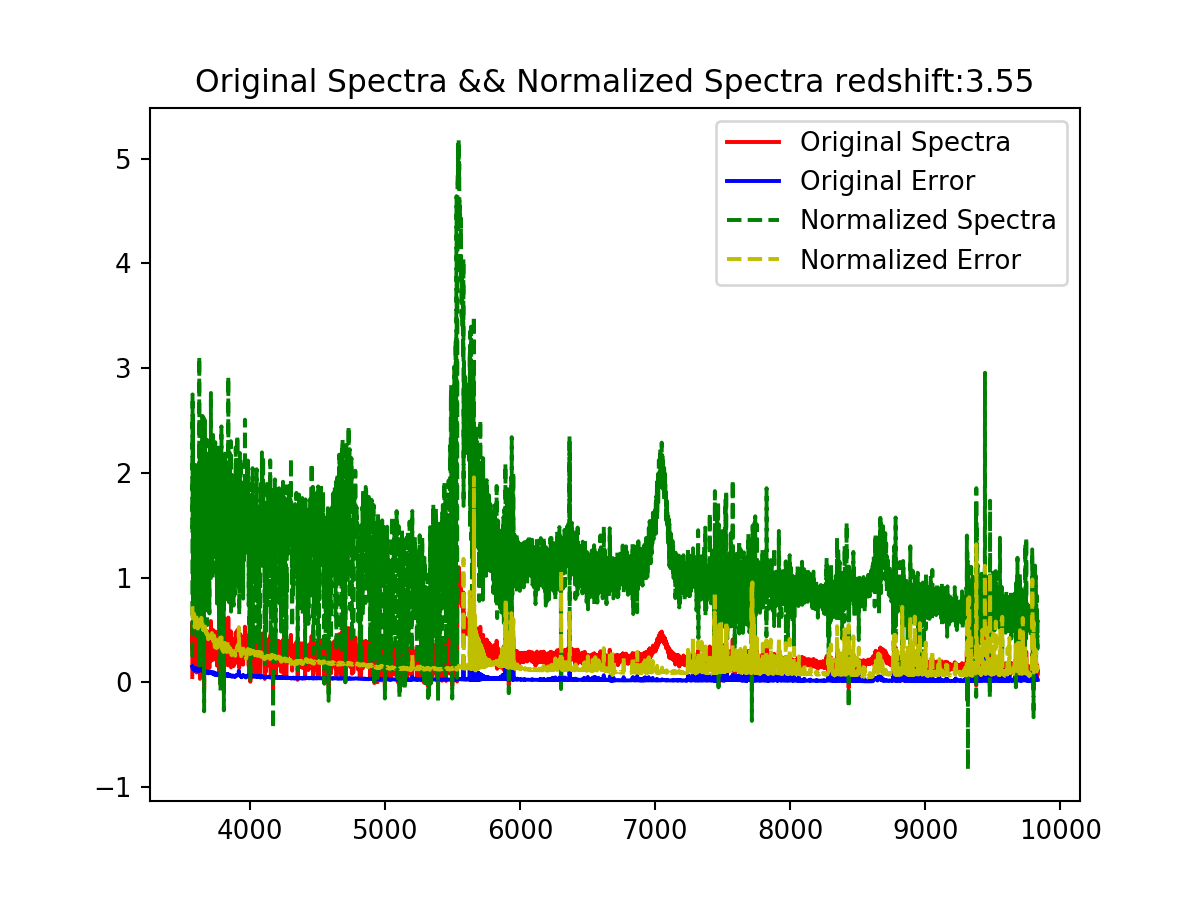

<IPython.core.display.Javascript object>


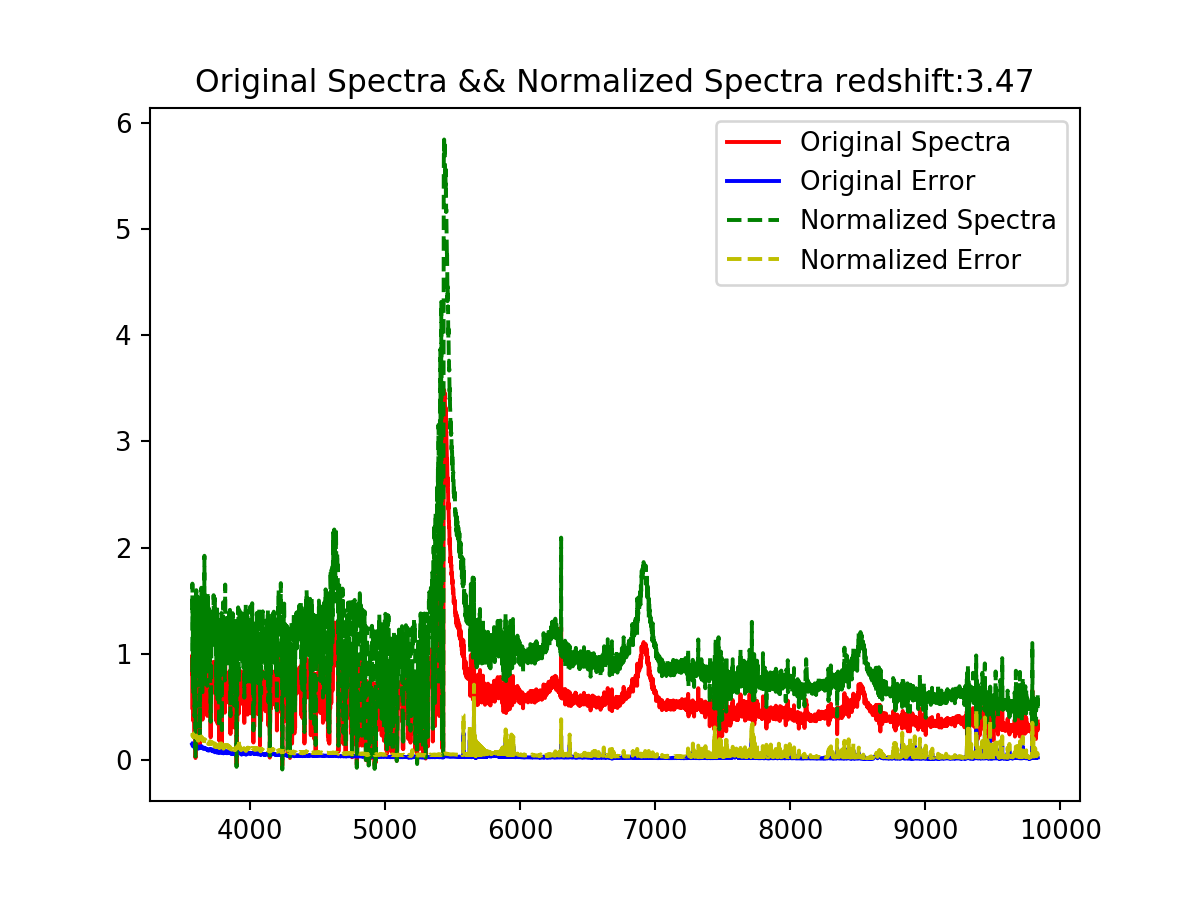

<IPython.core.display.Javascript object>


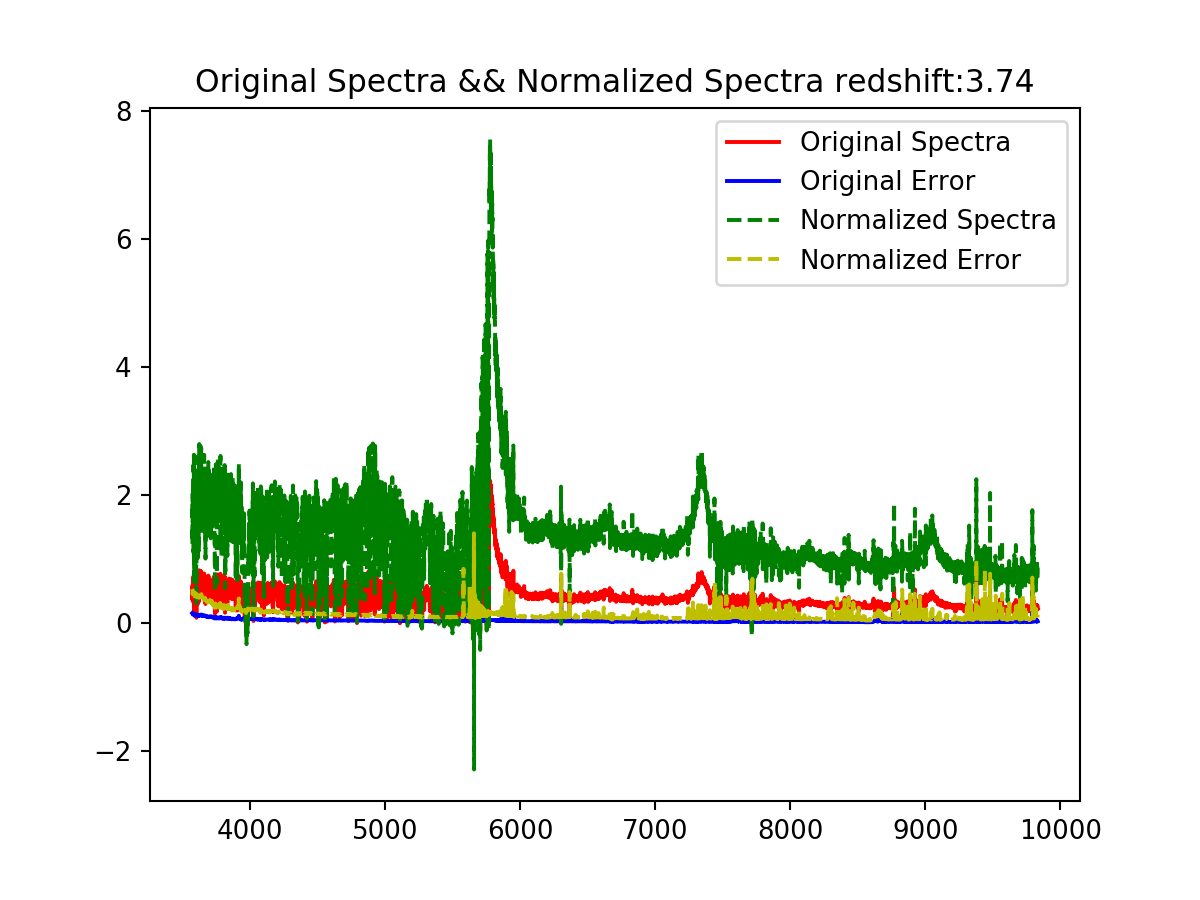

<IPython.core.display.Javascript object>


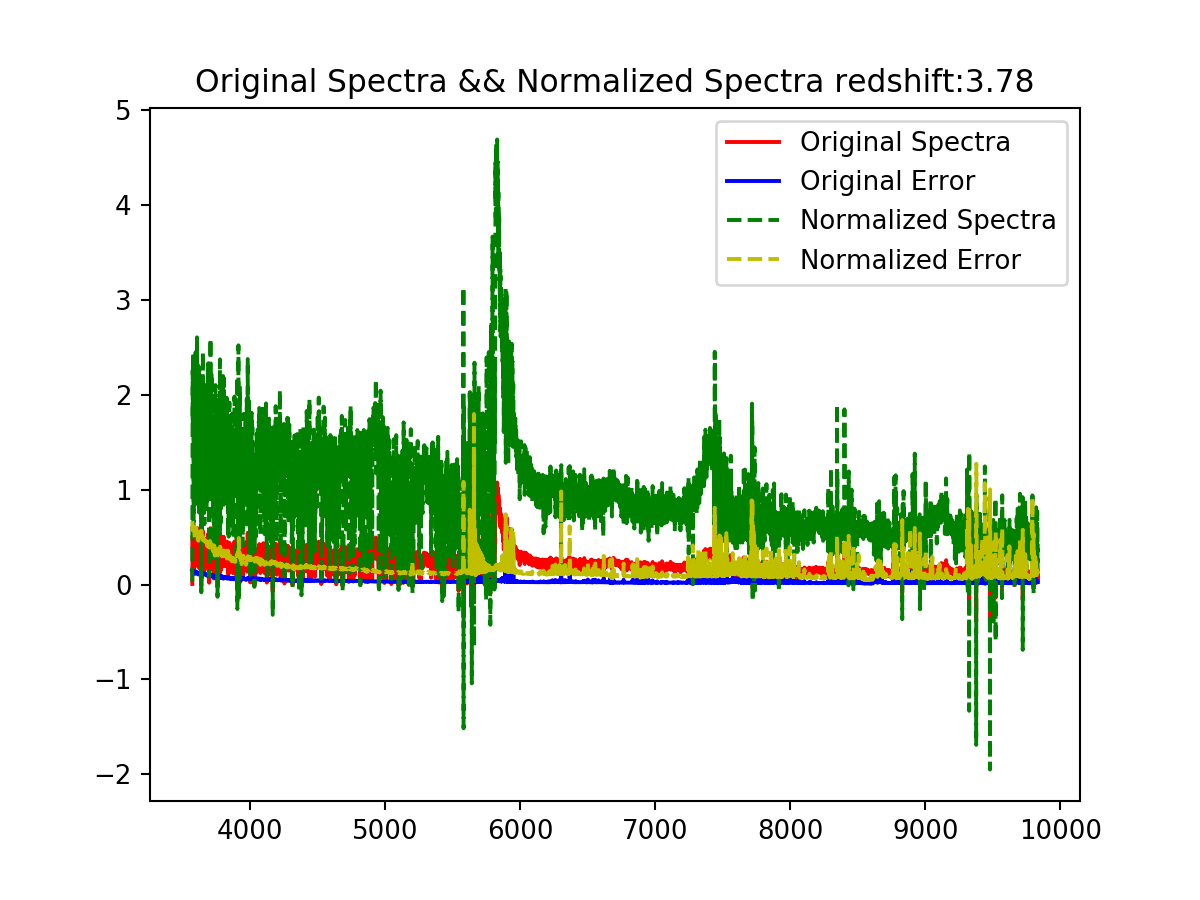

<IPython.core.display.Javascript object>


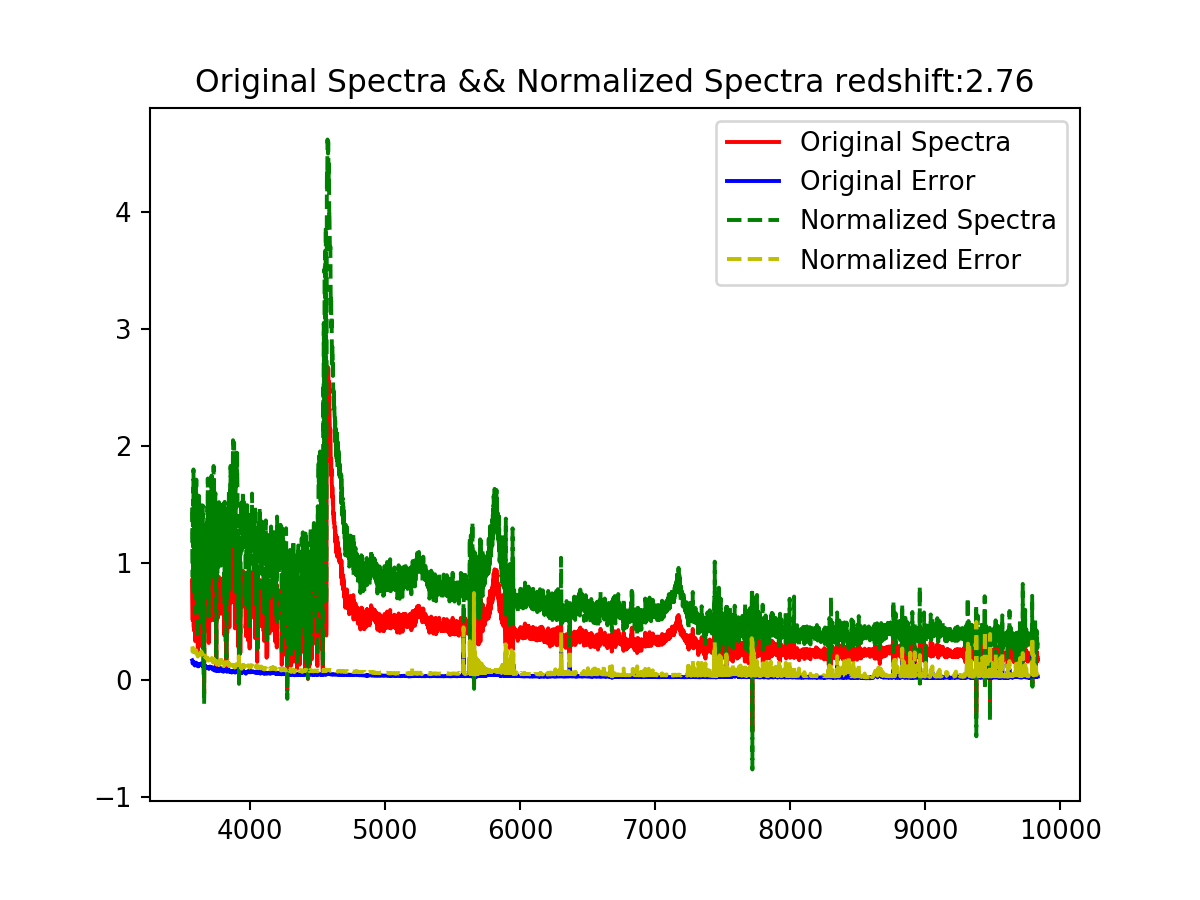

<IPython.core.display.Javascript object>


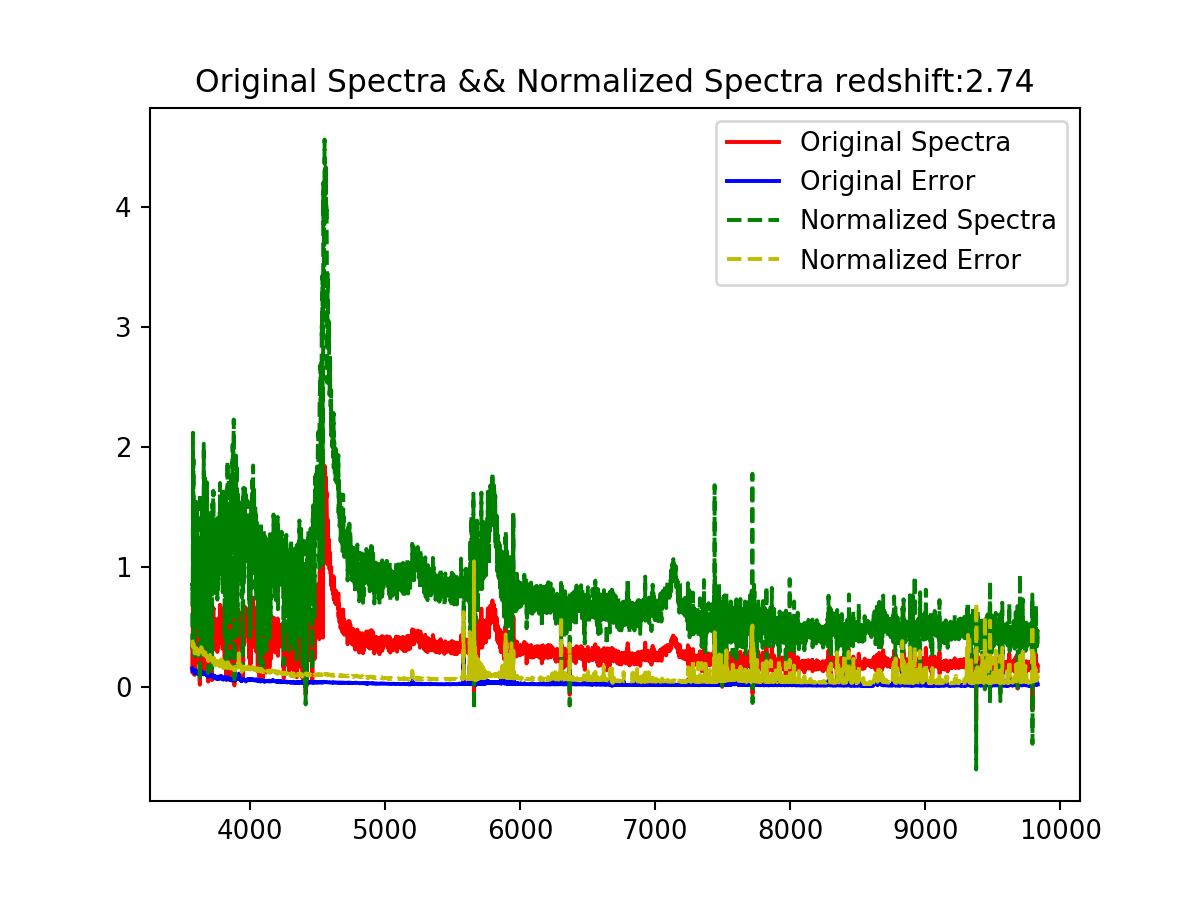

<IPython.core.display.Javascript object>


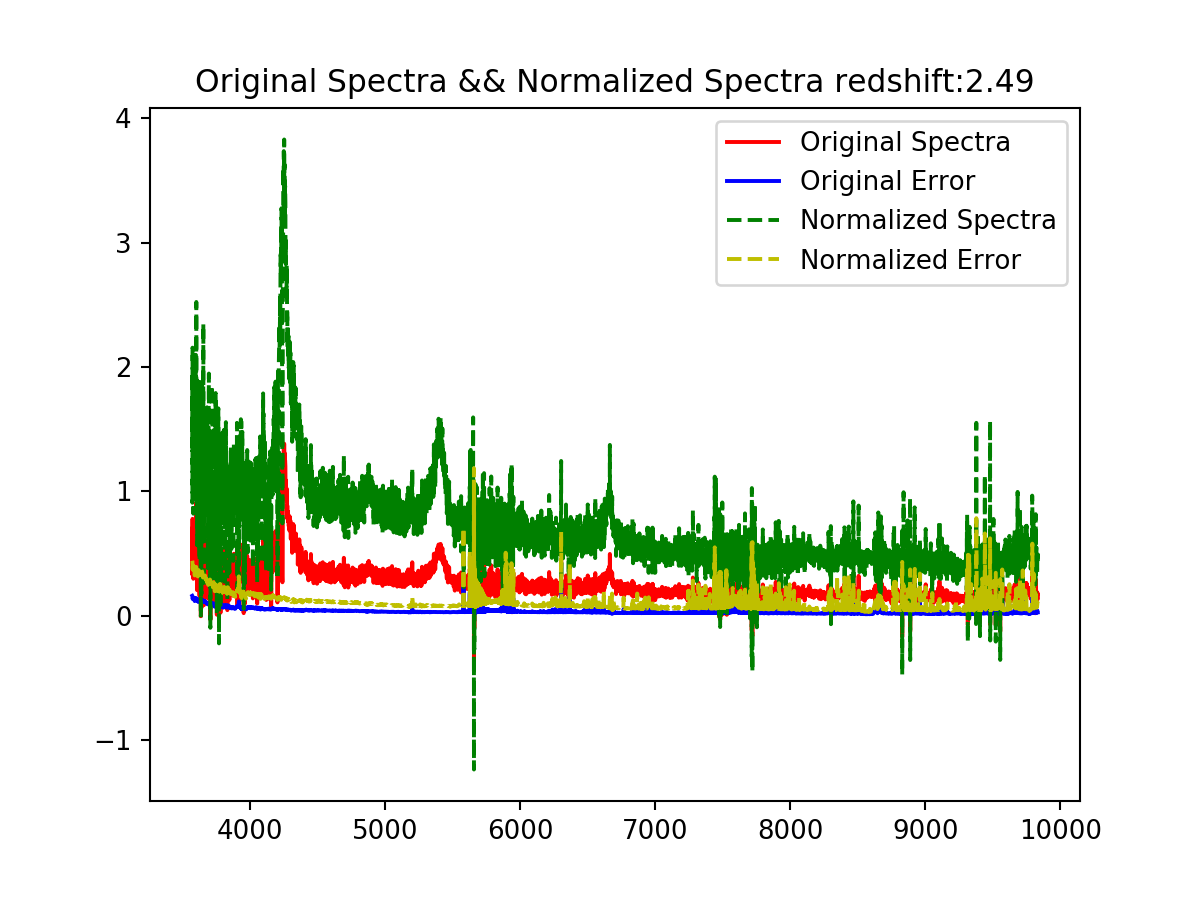

<IPython.core.display.Javascript object>


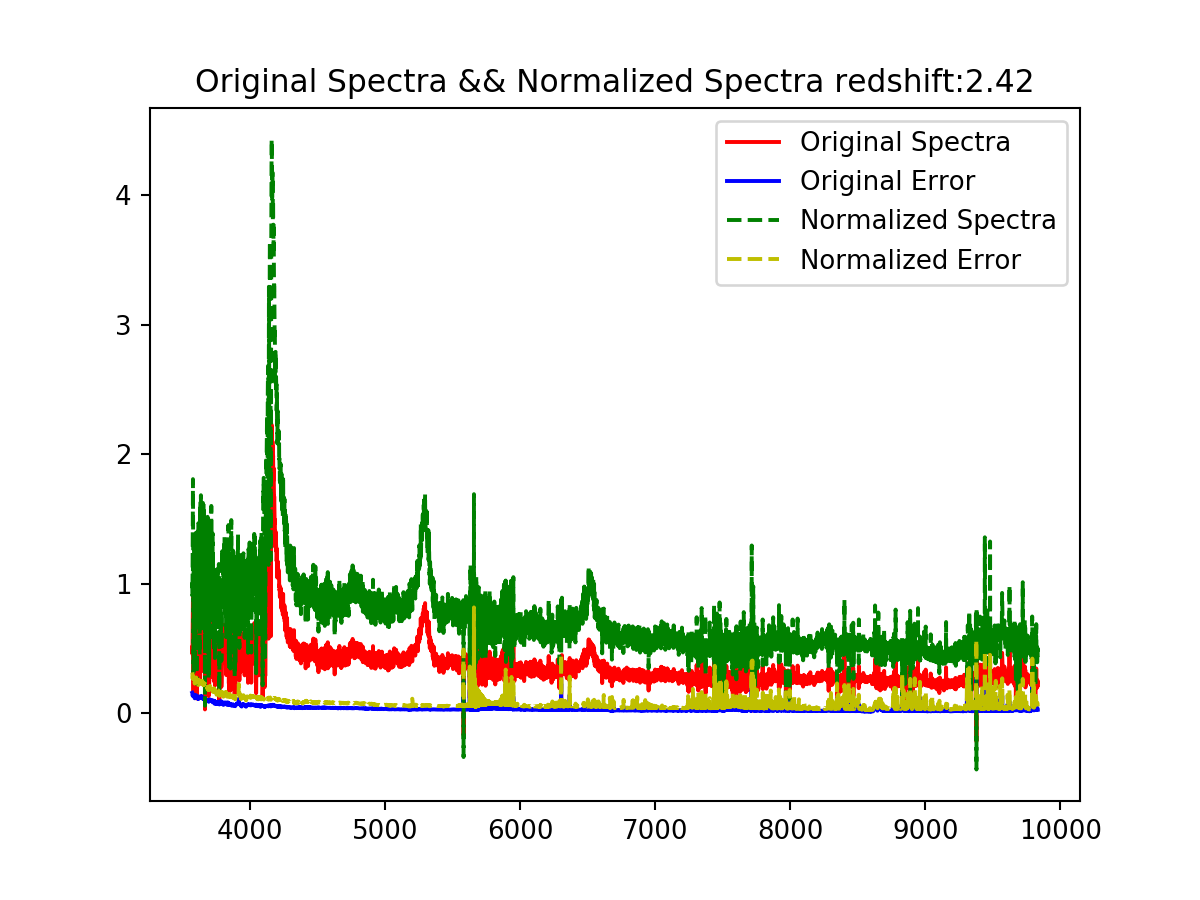

<IPython.core.display.Javascript object>


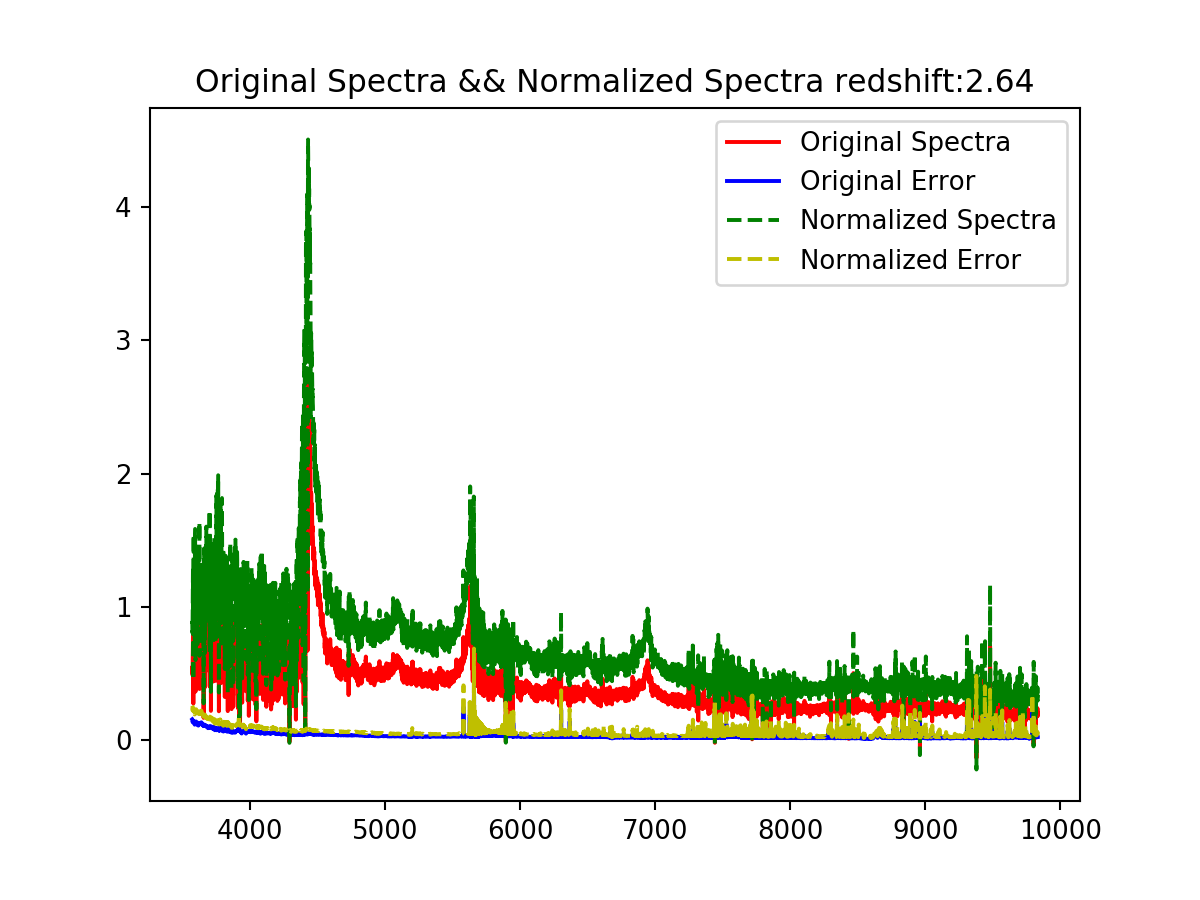

<IPython.core.display.Javascript object>


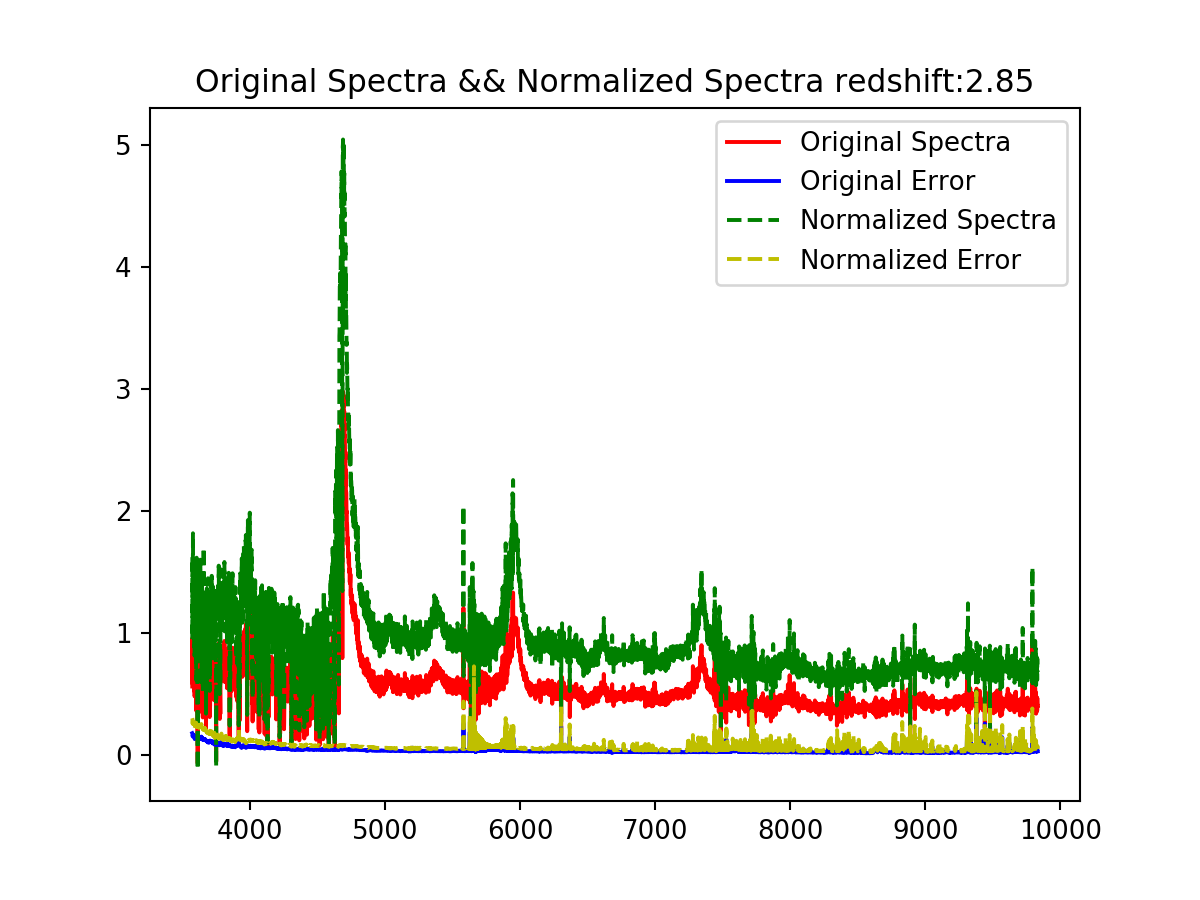

<IPython.core.display.Javascript object>


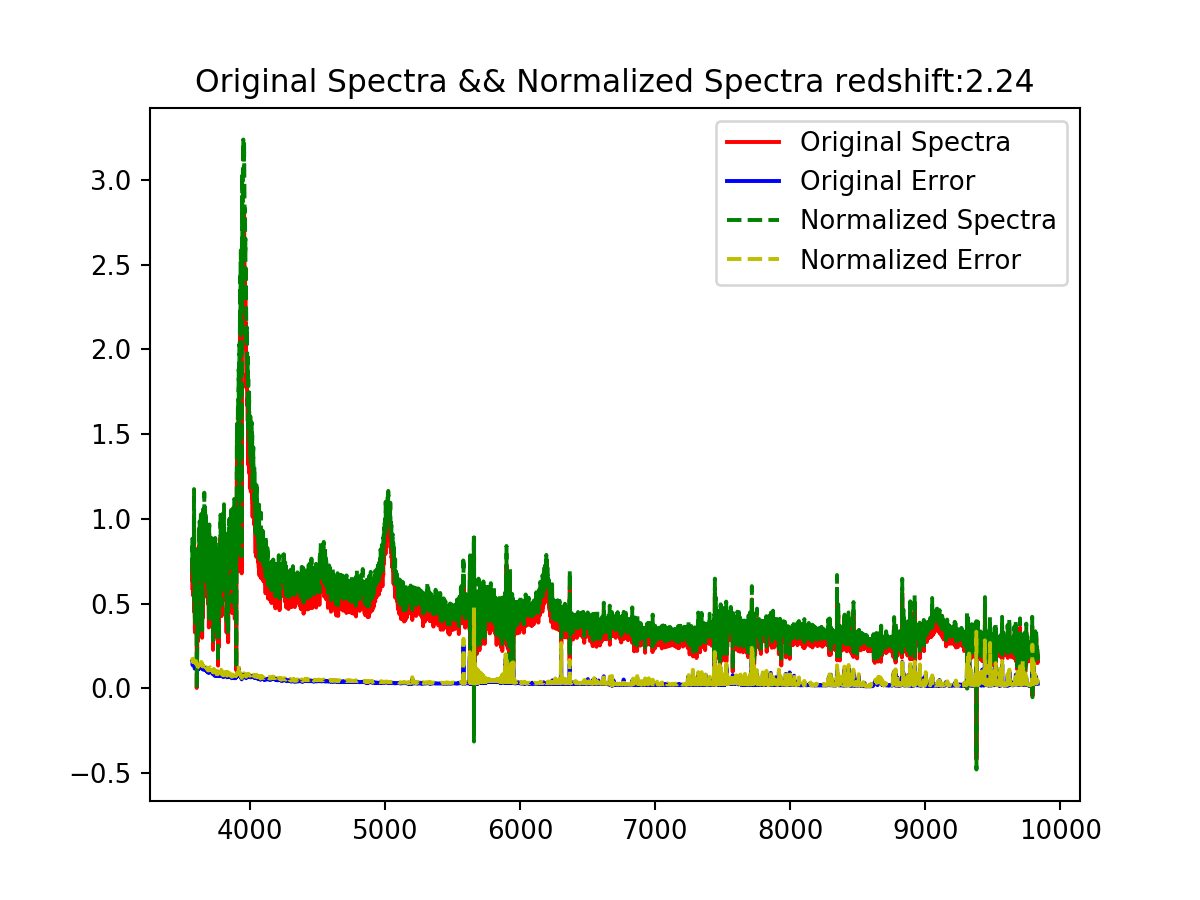

<IPython.core.display.Javascript object>


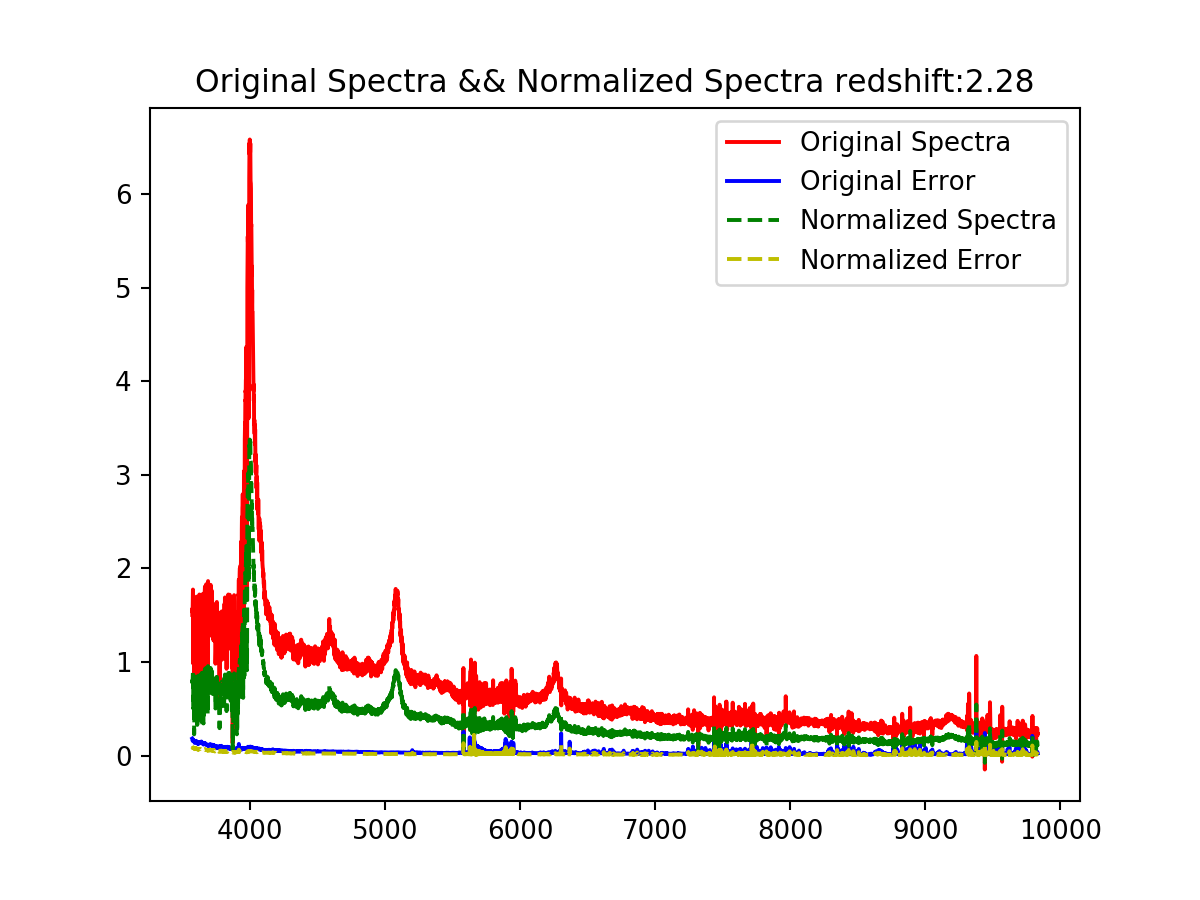

In [8]:
for key,value in selected_spectrum.items():
    sightline = spec.get_sightline(value,camera='all')
    new_sightline = nspec.get_sightline(value,camera='all',normalize=True)
    fig,axes = plt.subplots(1,1,sharex=True, sharey= True)
    axes.plot(10**sightline.loglam,sightline.flux,'r',label = 'Original Spectra')
    axes.plot(10**sightline.loglam,sightline.error,'b',label = 'Original Error')
    axes.set(**{'title':'Original Spectra && Normalized Spectra redshift:%.2f'%sightline.z_qso})
    axes.plot(10**new_sightline.loglam,new_sightline.flux,'g--', label = 'Normalized Spectra')
    axes.plot(10**new_sightline.loglam,new_sightline.error,'y--',label = 'Normalized Error')
    axes.legend(loc = 'best')
    plt.savefig("F:\\Astronamy\\normalized figure\\id-%i-z_qso-%.2f.png"%(value,sightline.z_qso))